题目：

使用高斯核函数解决线性不可分问题，并观察 σ 取值对模型复杂度的影响。数据集：data/ex6data2.mat

高斯核函数公式：
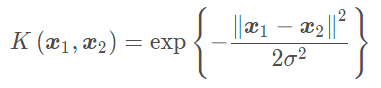

## 1.导入数据

In [1]:
# 导入库
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
# 导入数据
data = sio.loadmat('./data/ex6data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
X,y = data['X'],data['y']
X.shape,y.shape

((863, 2), (863, 1))

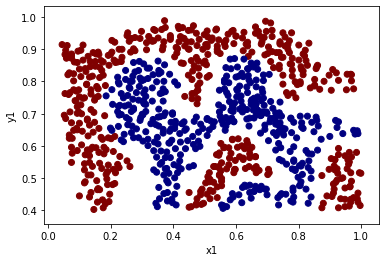

In [5]:
# 绘制数据可视化图
def plot_data():
    plt.scatter(X[:,0],X[:,1],c = y.flatten(), cmap ='jet')
    plt.xlabel('x1')
    plt.ylabel('y1')
    
plot_data()

## 2.机器学习SVM(这里我们使用sklearn现成的库)

1.σ=1 ，注意：sklearn中的σ表示为gammer，高斯核表示为rbf

In [8]:
svc1 = SVC(C=1,kernel='rbf',gamma=1)
svc1.fit(X,y.flatten())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
svc1.score(X,y.flatten())

0.8088064889918888

In [10]:
# 定义绘制决策边界的函数
def plot_boundary(model):
    x_min,x_max = 0,1
    y_min,y_max = 0.4,1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),
                       np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(),yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

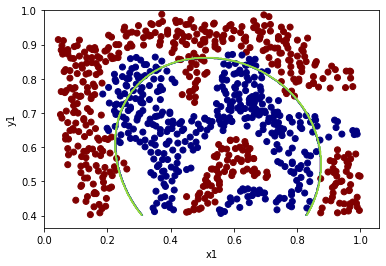

In [13]:
# 画图
plot_boundary(svc1)
plot_data()

可见：当gamma=1时，模型的拟合程度是远远不够的（欠拟合），我们需要进一步增大gamma。

2.σ = 50

0.9895712630359212


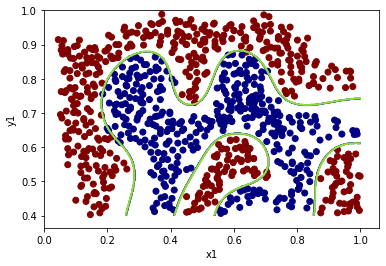

In [16]:
# 训练模型
svc50 = SVC(C=1,kernel='rbf',gamma=50)
svc50.fit(X,y.flatten())

# 模型得分
print(svc50.score(X,y.flatten()))

# 画图
plot_boundary(svc50)
plot_data()

可见：当gamma=50时，模型的拟合程度很不错，泛化能力也很好（just right）。

3.σ = 100

0.9976825028968713


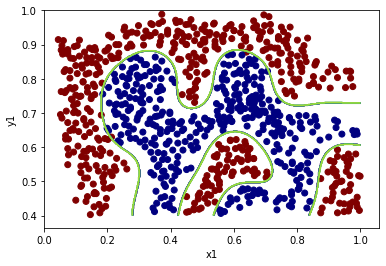

In [17]:
# 训练模型
svc100 = SVC(C=1,kernel='rbf',gamma=100)
svc100.fit(X,y.flatten())

# 模型得分
print(svc100.score(X,y.flatten()))

# 画图
plot_boundary(svc100)
plot_data()

可见：当gamma=100时，模型的拟合程度很完美，但是泛化能力可能会有不足（过拟合）。

## 3.总结

σ 值越大，模型复杂度越高，同时也越易过拟合

σ 值越小，模型复杂度越低，同时也越易欠拟合